### **Dataset Data Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Load the CSV files
comments_file_path = '/content/drive/MyDrive/glassdoor/glassdoor_benefits_comments.csv'
highlights_file_path = '/content/drive/MyDrive/glassdoor/glassdoor_benefits_highlights.csv'
comments_df = pd.read_csv(comments_file_path)
highlights_df = pd.read_csv(highlights_file_path)

# Display the first few rows of comments_df
comments_df.head()



,id,index,benefits.comments.val.city,benefits.comments.val.comment,benefits.comments.val.createDate,benefits.comments.val.currentJob,benefits.comments.val.jobTitle,benefits.comments.val.rating,benefits.comments.val.state
0,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the first few rows of highlights_df
highlights_df.head()



,id,benefits.highlights.val.highlightPhrase,benefits.highlights.val.icon,benefits.highlights.val.name,index,benefits.highlights.val.commentCount
0,44001,good flexibility for working from home,wfh,Work From Home,0.0,17.0
1,44001,I’ve not really had any time off for the last ...,sickDays,Sick Pay,1.0,14.0
2,44001,Very flexible if you don't work overtime and y...,flexWorkSched,Flexible Working,2.0,7.0
3,44002,NaN,NaN,NaN,NaN,NaN
4,44003,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print the shape of the comments dataframe
print("There are a total of", comments_df.shape[0], "records and", comments_df.shape[1], "columns in the comments dataframe.")

# Print the shape of the highlights dataframe
print("There are a total of", highlights_df.shape[0], "records and", highlights_df.shape[1], "columns in the highlights dataframe.")


There are a total of 271436 records and 9 columns in the comments dataframe.
There are a total of 212155 records and 6 columns in the highlights dataframe.


## **Descriptions of the dataset**
- Total Records: 271,436
- Total Columns: 9
- Missing Values: Significant missing values across several columns, including index, benefits.comments.val.city, benefits.comments.val.comment, and others.

- Unique Values in Categorical Columns:
1. benefits.comments.val.city: 545 unique cities, with "London" being the most common.
2. benefits.comments.val.comment: 7,428 unique comments.
3. benefits.comments.val.createDate: 7,438 unique creation dates.
benefits.comments.val.currentJob: 2 unique values ("True" being the most common).
4. benefits.comments.val.jobTitle: 1,646 unique job titles.
5. benefits.comments.val.state: 4 unique states.

Highlights DataFrame:
1. Total Records: 79,900
2. Total Columns: 6

Missing Values: Significant missing values, particularly in the columns benefits.highlights.val.highlightPhrase, benefits.highlights.val.icon, and benefits.highlights.val.name.

Unique Values in Categorical Columns:
1. benefits.highlights.val.highlightPhrase: 1,404 unique highlight phrases.
2. benefits.highlights.val.icon: 17 unique icons.
3. benefits.highlights.val.name: 24 unique benefit names.

In [ ]:
# For the comments dataframe
print("Number of null values in each column of the comments dataframe:")
print(comments_df.isna().sum())

# For the highlights dataframe
print("\nNumber of null values in each column of the highlights dataframe:")
print(highlights_df.isna().sum())



Number of null values in each column of the comments dataframe:
id                                       0
index                               102173
benefits.comments.val.city          102173
benefits.comments.val.comment       102173
benefits.comments.val.createDate    102173
benefits.comments.val.currentJob    102173
benefits.comments.val.jobTitle      202140
benefits.comments.val.rating        102173
benefits.comments.val.state         102173
dtype: int64

Number of null values in each column of the highlights dataframe:
id                                              0
benefits.highlights.val.highlightPhrase    132255
benefits.highlights.val.icon               132255
benefits.highlights.val.name               132255
index                                      132255
benefits.highlights.val.commentCount       132255
dtype: int64


In [ ]:
# For the comments dataframe
print("Information about the comments dataframe:")
comments_df.info()

# For the highlights dataframe
print("\nInformation about the highlights dataframe:")
highlights_df.info()


Information about the comments dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271436 entries, 0 to 271435
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                271436 non-null  int64  
 1   index                             169263 non-null  float64
 2   benefits.comments.val.city        169263 non-null  object 
 3   benefits.comments.val.comment     169263 non-null  object 
 4   benefits.comments.val.createDate  169263 non-null  object 
 5   benefits.comments.val.currentJob  169263 non-null  object 
 6   benefits.comments.val.jobTitle    69296 non-null   object 
 7   benefits.comments.val.rating      169263 non-null  float64
 8   benefits.comments.val.state       169263 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.6+ MB

Information about the highlights dataframe:
<class 'pandas.core.frame.DataFrame'

## Identify what columns to keeps

In [ ]:
# Identify relevant columns for comments including 'id'
relevant_comments_columns = ['id', 'benefits.comments.val.rating', 'benefits.comments.val.comment']

# Identify relevant columns for highlights including 'id'
relevant_highlights_columns = ['id', 'benefits.highlights.val.highlightPhrase', 'benefits.highlights.val.commentCount']

# Keep only relevant columns in comments_df
comments_df_relevant = comments_df[relevant_comments_columns]

# Keep only relevant columns in highlights_df
highlights_df_relevant = highlights_df[relevant_highlights_columns]

# Display the first few rows of comments_df_relevant
comments_df_relevant.head()


,id,benefits.comments.val.rating,benefits.comments.val.comment
0,401,NaN,NaN
1,402,NaN,NaN
2,403,NaN,NaN
3,404,NaN,NaN
4,405,NaN,NaN


In [ ]:
# Display the first few rows of highlights_df_relevant
highlights_df_relevant.head()


,id,benefits.highlights.val.highlightPhrase,benefits.highlights.val.commentCount
0,44001,good flexibility for working from home,17.0
1,44001,I’ve not really had any time off for the last ...,14.0
2,44001,Very flexible if you don't work overtime and y...,7.0
3,44002,NaN,NaN
4,44003,NaN,NaN


# Count the number of rows before removing rows with missing values

In [ ]:
# Count the number of rows before removing rows with missing values
comments_before_removal = comments_df_relevant.shape[0]
highlights_before_removal = highlights_df_relevant.shape[0]

comments_before_removal, highlights_before_removal


(271436, 212155)

# Removing rows with missing values

In [ ]:
# Remove rows with missing values in relevant columns
cleaned_comments_df = comments_df_relevant.dropna()
cleaned_highlights_df = highlights_df_relevant.dropna()

# Display the first few rows of cleaned_comments_df
cleaned_comments_df.head()


,id,benefits.comments.val.rating,benefits.comments.val.comment
5,406,4.0,Great Overall Benefits but its sometime diffic...
6,406,4.0,Good performance based bonus and opportunities...
7,406,4.0,Death in service is really good
9,408,5.0,Very good work life balance. Great location. P...
10,408,5.0,Opportunity to buy or sell 5 days of holidays ...


# Cleaned rows after nulls

In [ ]:
# Display the first few rows of cleaned_highlights_df
cleaned_highlights_df.head()


,id,benefits.highlights.val.highlightPhrase,benefits.highlights.val.commentCount
0,44001,good flexibility for working from home,17.0
1,44001,I’ve not really had any time off for the last ...,14.0
2,44001,Very flexible if you don't work overtime and y...,7.0
9,44008,Nothing special to write about here,3.0
13,44012,They offer sick pay when you are off sick,31.0


# Number of rows after removing rows with missing values

In [ ]:
# Count the number of rows after removing rows with missing values
comments_after_removal = cleaned_comments_df.shape[0]
highlights_after_removal = cleaned_highlights_df.shape[0]

comments_after_removal, highlights_after_removal


(169263, 79900)

# Merging dataset using 'id' column

In [ ]:
# Merge the datasets using the 'id' column
merged_df = pd.merge(cleaned_comments_df, cleaned_highlights_df, on='id', how='inner')

# Display the first few rows of the merged dataframe
merged_df_head = merged_df.head()
merged_df_head


,id,benefits.comments.val.rating,benefits.comments.val.comment,benefits.highlights.val.highlightPhrase,benefits.highlights.val.commentCount
0,406,4.0,Great Overall Benefits but its sometime diffic...,Good flexibility for working from home as long...,26.0
1,406,4.0,Great Overall Benefits but its sometime diffic...,Paid sick leave and extended leave,22.0
2,406,4.0,Great Overall Benefits but its sometime diffic...,Work from home policy.,7.0
3,406,4.0,Good performance based bonus and opportunities...,Good flexibility for working from home as long...,26.0
4,406,4.0,Good performance based bonus and opportunities...,Paid sick leave and extended leave,22.0


# Duplicates after merging

In [ ]:
num_duplicated = len(merged_df[merged_df.duplicated()])
print("Number of duplicated records in the dataset:",num_duplicated)
print("Percentage of duplicated records in the dataset:",(num_duplicated/merged_df.shape[0])*100)

Number of duplicated records in the dataset: 548
Percentage of duplicated records in the dataset: 0.22861910721735504


In [ ]:
clean_df = merged_df.drop_duplicates()
print("Number of duplicates dropped:",merged_df.shape[0] - clean_df.shape[0])
print("Number of records after dropping duplicates:",clean_df.shape[0])

Number of duplicates dropped: 548
Number of records after dropping duplicates: 239152


# Checking columns and number of rows

In [ ]:
# Check the columns and the number of rows
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 239152 entries, 0 to 239699
Data columns (total 5 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id                                       239152 non-null  int64  
 1   benefits.comments.val.rating             239152 non-null  float64
 2   benefits.comments.val.comment            239152 non-null  object 
 3   benefits.highlights.val.highlightPhrase  239152 non-null  object 
 4   benefits.highlights.val.commentCount     239152 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.9+ MB


# Visualization

In [ ]:
import numpy as np

def remove_outliers_iqr(df):
    df_clean = df.copy()

    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

# Apply the function to remove outliers
clean_df_no_outliers = remove_outliers_iqr(clean_df)
print(clean_df_no_outliers.head())  # This will print the first few rows if the variable is correctly defined



    id  benefits.comments.val.rating  \
0  406                           4.0   
1  406                           4.0   
2  406                           4.0   
3  406                           4.0   
4  406                           4.0   

                       benefits.comments.val.comment  \
0  Great Overall Benefits but its sometime diffic...   
1  Great Overall Benefits but its sometime diffic...   
2  Great Overall Benefits but its sometime diffic...   
3  Good performance based bonus and opportunities...   
4  Good performance based bonus and opportunities...   

             benefits.highlights.val.highlightPhrase  \
0  Good flexibility for working from home as long...   
1                Paid sick leave  and extended leave   
2                           Work from home policy.     
3  Good flexibility for working from home as long...   
4                Paid sick leave  and extended leave   

   benefits.highlights.val.commentCount  
0                                  26.0  
1

# Distribution of Ratings before Outliers & After

##  Analysis of Rating Distribution Before and After Outlier Removal

- **Objective:** To understand how the distribution of employee ratings changes after removing outliers using the IQR method.

- **Before Outlier Removal:**
  - The ratings show a strong positive skew, with the majority of ratings concentrated at 4 and 5.
  - The most frequent rating was 4, followed closely by 5.
  - Lower ratings (1 and 2) were less common but still present in the dataset.
  - The distribution had noticeable peaks, indicating certain common sentiments among employees.

- **After Outlier Removal:**
  - The overall distribution remained similar, with ratings of 4 and 5 still dominating, indicating consistent positive employee sentiment.
  - The frequencies of all ratings decreased slightly, especially for the most frequent ratings, suggesting the removal of some extreme values.
  - The distribution of lower ratings (1 and 2) became smoother, implying that some of these were outliers.
  - The rating distribution after outlier removal is cleaner and more consistent, providing a more accurate representation of general employee sentiment.

- **Conclusion:** Outlier removal had a minor impact on the distribution of ratings, particularly in smoothing the lower ratings and reducing some of the extreme values. The overall positive sentiment of the ratings remained unchanged, indicating a generally positive response from employees.


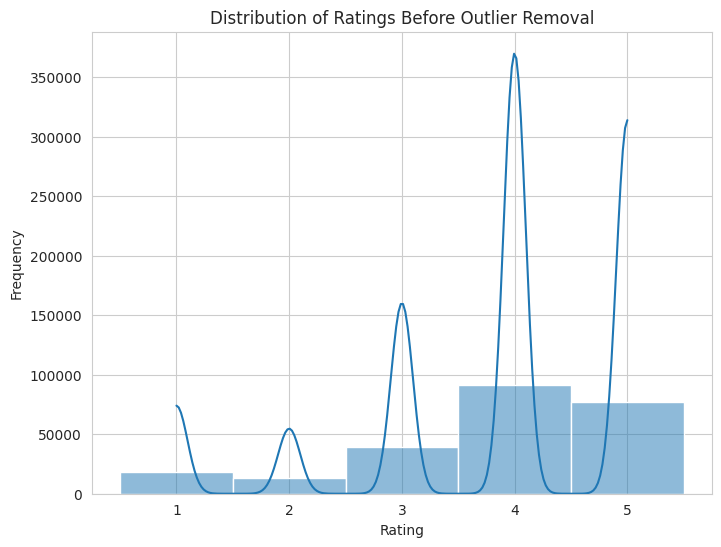

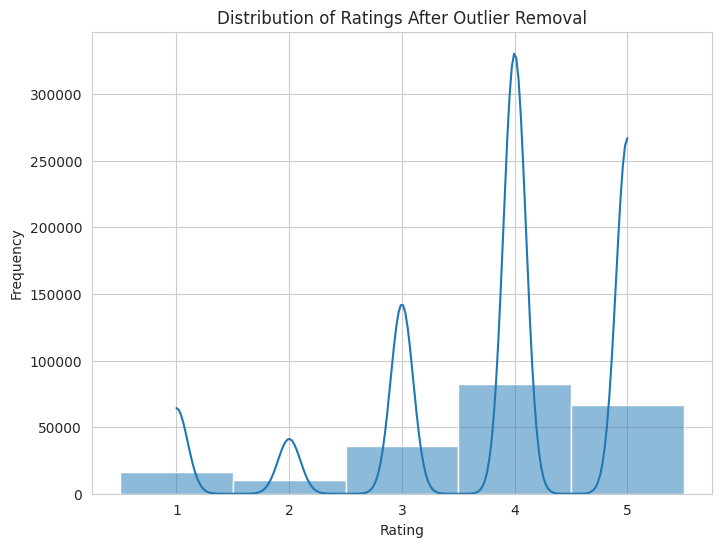

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a histogram for the 'benefits.comments.val.rating' column with bins 1 through 5
plt.figure(figsize=(8, 6))
sns.histplot(clean_df['benefits.comments.val.rating'], kde=True, bins=[1, 2, 3, 4, 5, 6], discrete=True)
plt.title('Distribution of Ratings Before Outlier Removal')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Ensure only integer ticks are shown
plt.show()

# After outlier removal
plt.figure(figsize=(8, 6))
sns.histplot(clean_df_no_outliers['benefits.comments.val.rating'], kde=True, bins=[1, 2, 3, 4, 5, 6], discrete=True)
plt.title('Distribution of Ratings After Outlier Removal')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Ensure only integer ticks are shown
plt.show()


# Distribution of Employee Benefits Ratings
### Distribution of Benefits Ratings After Outlier Removal

- **Overview:**
  - This chart displays the exact count of each rating (1 through 5) given by employees for the benefits they receive.

- **High Ratings (4 and 5):**
  - **Rating 4:** The most common rating, with over 80,000 instances, indicating strong satisfaction with benefits.
  - **Rating 5:** The second most frequent rating, with approximately 70,000 occurrences, also reflecting positive employee sentiment.

- **Moderate Rating (3):**
  - **Rating 3:** This rating occurs less frequently than 4 and 5, with around 40,000 instances, suggesting a smaller group of employees have a neutral stance on the benefits.

- **Low Ratings (1 and 2):**
  - **Rating 1:** The least common rating, with fewer than 20,000 occurrences, highlighting a small number of very dissatisfied employees.
  - **Rating 2:** Slightly more common than rating 1, but still relatively rare, showing that negative feedback is minimal.

- **Key Insight:**
  - The majority of employees are generally satisfied with their benefits, as shown by the dominance of ratings 4 and 5.
  - The low occurrence of ratings 1 and 2 indicates that dissatisfaction with benefits is not widespread among employees.


<ipython-input-73-b1f6ddf6361c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='benefits.comments.val.rating', data=clean_df_no_outliers, palette='viridis')


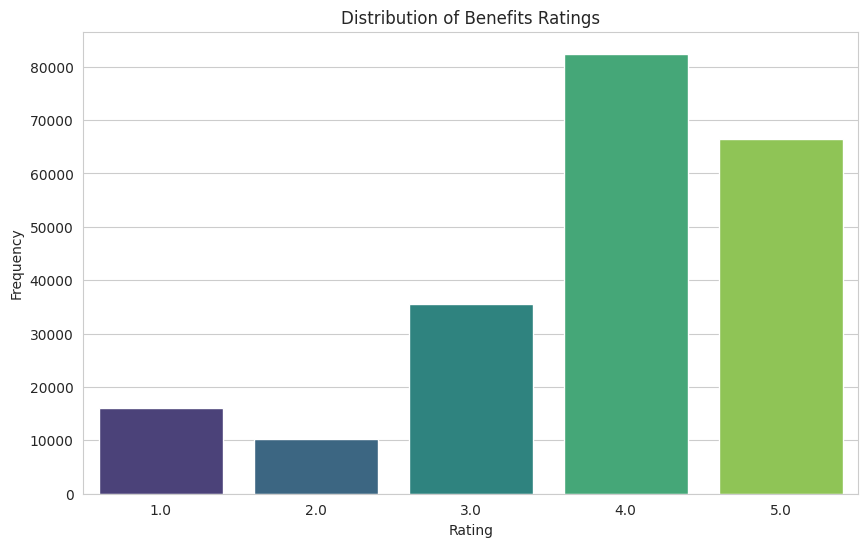

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of benefits ratings grouped by rating categories
plt.figure(figsize=(10, 6))
sns.countplot(x='benefits.comments.val.rating', data=clean_df_no_outliers, palette='viridis')
plt.title('Distribution of Benefits Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Distribution of Benefit Themes
### Distribution of Benefit Themes (Refined)

- **Overview:**
  - The chart displays the frequency of various benefit themes as mentioned by employees in their comments.

- **Top Themes:**
  - **Other:** The 'Other' category is the most frequent, with nearly 100,000 occurrences. This indicates that a significant portion of the highlight phrases did not fit into the predefined categories.
  - **Sick Pay:** This is the most frequently mentioned specific theme, with over 60,000 occurrences, showing that sick pay is a major concern or interest for employees.
  - **Work From Home:** The third most common theme, with around 40,000 mentions, reflecting the importance of remote work options for employees.

- **Moderate Themes:**
  - **Flexibility:** Flexibility is also a significant theme, with about 30,000 mentions, highlighting its value to employees.
  - **Health Benefits:** With around 20,000 mentions, health benefits are another important aspect of employee benefits.
  - **Leave Policy:** This theme has approximately 10,000 mentions, indicating the importance of vacation, holiday, and leave policies.

- **Less Common Themes:**
  - **Discounts/Perks:** Mentioned about 5,000 times, suggesting that while appreciated, they are less central to employee satisfaction.
  - **Work-Life Balance and Flexible Working Hours:** These themes have fewer mentions, indicating they are less commonly highlighted by employees.
  - **Retirement Benefits and Company Equipment:** These are the least mentioned themes, suggesting they are less frequently discussed in the context of employee benefits.

- **Insight:**
  - The 'Other' category's prominence suggests that there may be other important themes not captured by the predefined categories, which could be explored further.
  - Specific themes like Sick Pay, Work From Home, and Flexibility are highly valued by employees, indicating areas where employers might focus their benefit offerings.

This analysis provides a structured overview of the key themes mentioned by employees, helping to identify the most and least important aspects of their benefits based on the frequency of mentions.


<ipython-input-74-8feb3cdbea34>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refined_theme_counts.values, y=refined_theme_counts.index, palette='viridis')


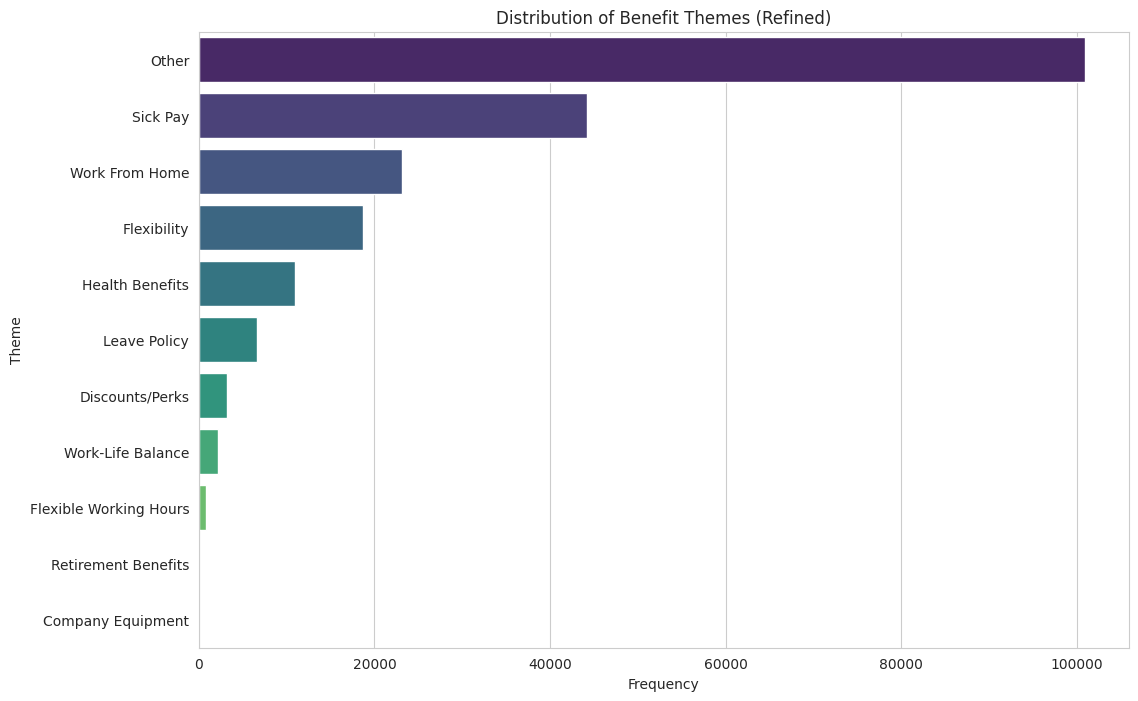

In [ ]:
# Define the themes and map highlight phrases to these themes
def refine_categorize_highlight(phrase):
    phrase = phrase.lower()
    if 'sick' in phrase:
        return 'Sick Pay'
    elif 'work-life' in phrase or 'work life' in phrase:
        return 'Work-Life Balance'
    elif 'flexibility' in phrase or 'flexible' in phrase:
        return 'Flexibility'
    elif 'health' in phrase or 'insurance' in phrase or 'coverage' in phrase:
        return 'Health Benefits'
    elif 'retirement' in phrase or '401k' in phrase:
        return 'Retirement Benefits'
    elif 'work from home' in phrase or 'wfh' in phrase or 'home' in phrase:
        return 'Work From Home'
    elif 'equipment' in phrase or 'tools' in phrase:
        return 'Company Equipment'
    elif 'discount' in phrase or 'perk' in phrase:
        return 'Discounts/Perks'
    elif 'leave' in phrase or 'holiday' in phrase or 'vacation' in phrase:
        return 'Leave Policy'
    elif 'hours' in phrase or 'schedule' in phrase:
        return 'Flexible Working Hours'
    else:
        return 'Other'

# Apply the refined categorization
clean_df_no_outliers['theme'] = clean_df_no_outliers['benefits.highlights.val.highlightPhrase'].apply(refine_categorize_highlight)

# Plot the distribution of refined themes
plt.figure(figsize=(12, 8))
refined_theme_counts = clean_df_no_outliers['theme'].value_counts()
sns.barplot(x=refined_theme_counts.values, y=refined_theme_counts.index, palette='viridis')
plt.title('Distribution of Benefit Themes (Refined)')
plt.xlabel('Frequency')
plt.ylabel('Theme')
plt.show()




# Exploring the 'Other' Category in Benefit Themes

In [ ]:
# Display a larger sample of phrases in the "Other" category for inspection
other_phrases_sample = clean_df_no_outliers[clean_df_no_outliers['theme'] == 'Other']['benefits.highlights.val.highlightPhrase'].unique()
other_phrases_sample[:100]  # Display the first 100 unique phrases for inspection



array(['Offered by default and it is decent ',
       'No one uses it. Stop trying to sell it as a benefit. ',
       'Group IT systems make it just like being in the office.',
       'good work has been great',
       '10 percent off of Amazon products online',
       'Good car policy,  the rest is poor',
       'twice a year, supports buying a bike',
       'hardly worth bothering about ', '4 weeks a year stanard ',
       'Not as good as some other companies',
       'Standard 5 day benefit in UK',
       'AMAZING: 30% IN STORE, 44% ONLINE ( Can only claim 1code every month now)',
       'good, there is an online centre for employees so they get the full adidas experience where you learn about the different technologies ',
       "It's paid and not questioned.",
       'usually accomodating but depends on role and team',
       'This is a great way to re-assure employees ',
       "have to buy this then you're told to be grateful.",
       'Pay a taxable premium to get the benefit, 

# Word Cloud for "Other" Category

- **Purpose:**
  - This word cloud visualizes the most common words and phrases found in the "Other" category of benefit themes. The size of each word indicates its frequency.

- **Key Observations:**
  - **Prominent Words:**
    - **"Good," "Work," "Great," "Percent," "Products":** These words are among the largest and most prominent in the word cloud, suggesting they are frequently mentioned in the "Other" category.
    - **"Amazon," "Online":** These words also appear frequently, indicating a strong association with specific company benefits or online services/products.

  - **Potential New Themes:**
    - The prominence of certain words like "Products," "Online," and "Percent" suggests that there may be recurring topics that were not captured by the predefined themes.
    - Words like "Bike," "Distance," and "Motorways" may indicate transportation-related benefits or concerns that could be categorized separately.

- **Insight:**
  - The "Other" category contains a variety of terms that may be grouped into new themes, offering insights into areas of employee benefits that were not initially considered.


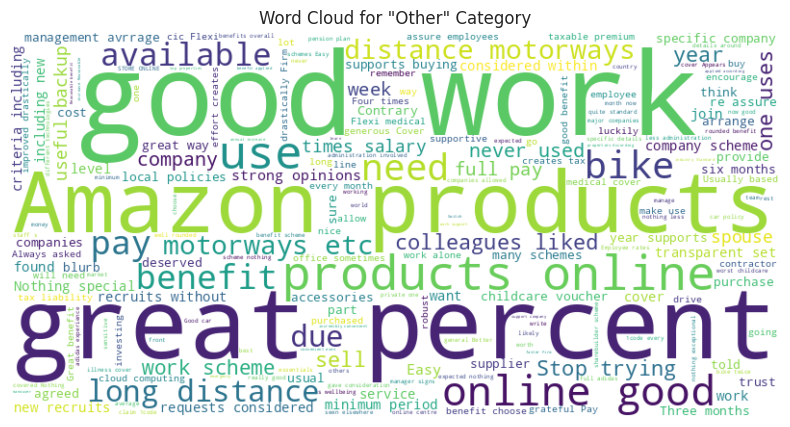

In [ ]:
from wordcloud import WordCloud

# Combine all phrases in the "Other" category into a single string
other_phrases_text = ' '.join(clean_df_no_outliers[clean_df_no_outliers['theme'] == 'Other']['benefits.highlights.val.highlightPhrase'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(other_phrases_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for "Other" Category')
plt.show()



### Distribution of Refined Themes within the "Other" Category

- **Purpose:**
  - This chart visualizes the refined themes within the "Other" category after further categorization of phrases that did not initially fit into the predefined benefit themes.

- **Key Observations:**
  - **Miscellaneous:**
    - This theme remains the most frequent, with over 60,000 occurrences, indicating that many phrases still don't fit neatly into the newly defined categories.
  - **Positive Feedback:**
    - The second most common theme, with around 20,000 mentions, suggests that many "Other" phrases include general positive feedback, such as words like "good."
  - **Online Benefits:**
    - This theme appears frequently, with around 10,000 mentions, reflecting the presence of benefits related to online services or products.
  - **Discounts:**
    - Phrases related to discounts or percentage offers make up a smaller, but notable portion of the "Other" category.
  - **Company Policies:**
    - This theme, which includes mentions of company policies or schemes, is the least frequent among the specific themes, but still noteworthy.

- **Insights:**
  - The large "Miscellaneous" category suggests that further refinement or additional themes might be needed to fully categorize all the phrases in the "Other" category.
  - The presence of specific themes like "Positive Feedback" and "Online Benefits" shows that some of the "Other" phrases do relate to distinct areas, but many still remain uncategorized.


<ipython-input-77-21a3d7904ebc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_only_df['refined_theme'] = other_only_df['benefits.highlights.val.highlightPhrase'].apply(refine_other_category)
<ipython-input-77-21a3d7904ebc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=refined_other_theme_counts.values, y=refined_other_theme_counts.index, palette='viridis')


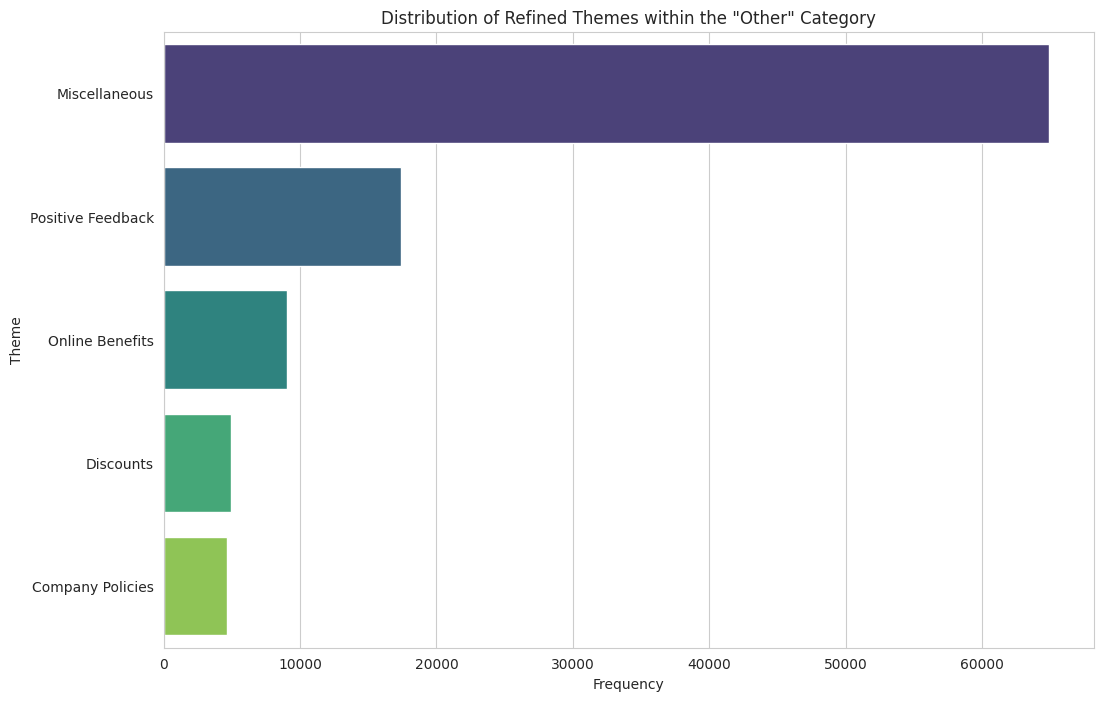

In [ ]:
# Filter out the "Other" category and only focus on it
other_only_df = clean_df_no_outliers[clean_df_no_outliers['theme'] == 'Other']

# Define more specific themes within the "Other" category
def refine_other_category(phrase):
    phrase = phrase.lower()
    if 'online' in phrase:
        return 'Online Benefits'
    elif 'good' in phrase:
        return 'Positive Feedback'
    elif 'percent' in phrase or 'off' in phrase:
        return 'Discounts'
    elif 'policy' in phrase or 'scheme' in phrase:
        return 'Company Policies'
    else:
        return 'Miscellaneous'

# Apply the refined categorization to the "Other" category
other_only_df['refined_theme'] = other_only_df['benefits.highlights.val.highlightPhrase'].apply(refine_other_category)

# Plot the distribution of the refined themes within the "Other" category
plt.figure(figsize=(12, 8))
refined_other_theme_counts = other_only_df['refined_theme'].value_counts()
sns.barplot(x=refined_other_theme_counts.values, y=refined_other_theme_counts.index, palette='viridis')
plt.title('Distribution of Refined Themes within the "Other" Category')
plt.xlabel('Frequency')
plt.ylabel('Theme')
plt.show()



### Average Rating by Benefit Themes

- **Overview:**
  - This chart displays the average rating for each benefit theme, with ratings ranging from 1 (least satisfied) to 5 (most satisfied).

- **High Average Ratings:**
  - **Company Equipment:** The highest average rating among all themes, indicating strong employee satisfaction with the equipment provided by the company.
  - **Discounts/Perks and Flexibility:** These benefits also receive high average ratings, showing that employees are generally very satisfied with these aspects.

- **Moderate Average Ratings:**
  - **Work-Life Balance and Flexible Working Hours:** These themes are rated positively but slightly lower than the top-rated themes, indicating good satisfaction levels.
  - **Sick Pay and Work From Home:** These benefits have average ratings around 3.5 to 4, reflecting moderate satisfaction.

- **Lower Average Ratings:**
  - **Health Benefits and Retirement Benefits:** These themes have the lowest average ratings, suggesting that employees may be less satisfied with the company's health and retirement offerings.
  - **Leave Policy:** Also receives lower ratings, indicating potential dissatisfaction with the company's leave policies.

- **Insights:**
  - **Strengths:** The highest-rated themes reflect areas where the company excels in meeting employee needs, such as providing quality equipment and offering desirable perks and discounts.
  - **Areas for Improvement:** The lower ratings for health benefits, retirement benefits, and leave policies suggest these are areas where the company could focus on enhancing its offerings to improve employee satisfaction.

- **Conclusion:**
  - The chart highlights both strengths and weaknesses in the company's benefit offerings. While most themes are rated fairly high, there is room for improvement, especially in the areas of health and retirement benefits, as well as leave policies.


<ipython-input-78-469cfe598a20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_benefitthemes.values, y=average_rating_by_benefitthemes.index, palette='viridis')


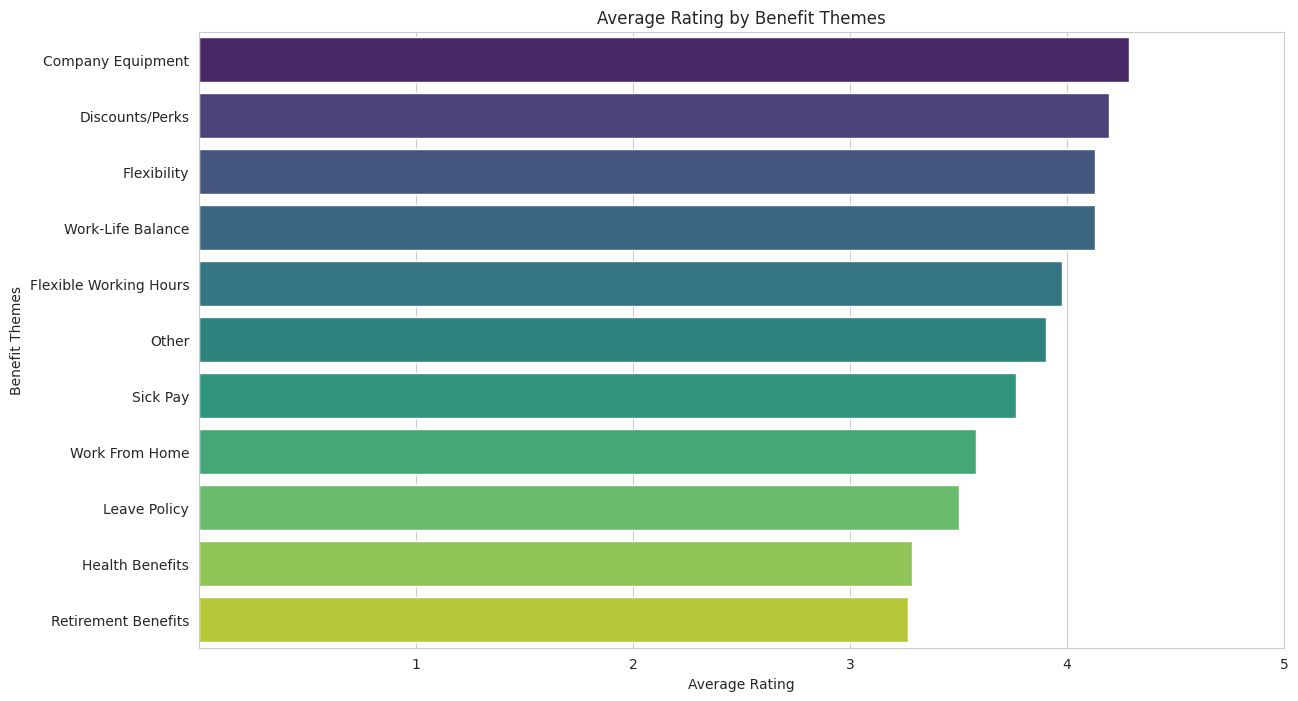

In [ ]:
# Calculate average rating by benefit theme
average_rating_by_benefitthemes = clean_df_no_outliers.groupby('theme')['benefits.comments.val.rating'].mean().sort_values(ascending=False)

# Plot the average rating by benefit theme
plt.figure(figsize=(14, 8))
sns.barplot(x=average_rating_by_benefitthemes.values, y=average_rating_by_benefitthemes.index, palette='viridis')
plt.title('Average Rating by Benefit Themes')
plt.xlabel('Average Rating')
plt.ylabel('Benefit Themes')

# Set x-axis ticks to be whole numbers from 1 to 5
plt.xticks([1, 2, 3, 4, 5])

plt.show()


#  Overall Sentiment Distribution

- **Purpose:**
  - This chart visualizes the overall distribution of sentiments in employee comments, categorized as Positive, Neutral, or Negative.

- **Key Observations:**
  - **Positive Sentiment:** The most dominant sentiment, with over 140,000 comments classified as positive, reflecting general satisfaction among employees.
  - **Neutral Sentiment:** The second most common sentiment, with about 50,000 comments, indicating a significant portion of employees have neutral or mixed feelings about their benefits.
  - **Negative Sentiment:** The least frequent sentiment, with approximately 30,000 comments classified as negative, showing that while there is some dissatisfaction, it is relatively limited.

- **Insights:**
  - The overwhelming positive sentiment suggests that employees are generally happy with their benefits or the company overall.
  - The presence of neutral comments indicates areas where employee opinions might be balanced, neither strongly positive nor negative.

- **Conclusion:**
  - The sentiment analysis provides a clear overview of employee satisfaction levels, with a strong positive bias. The company can use these insights to maintain strengths and address areas of concern.


<ipython-input-79-7a27e5068fc7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_sentiment_counts.index, y=overall_sentiment_counts.values, palette='viridis')


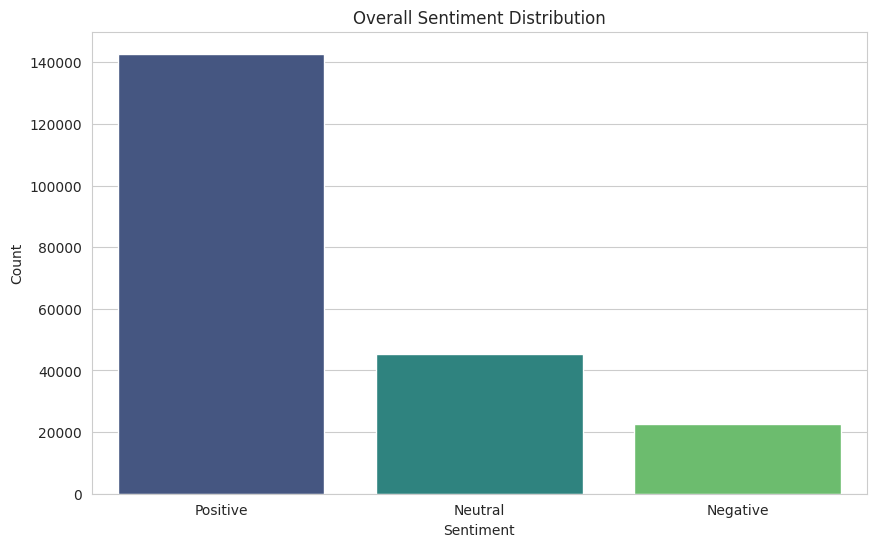

In [ ]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the entire dataset
clean_df_no_outliers['sentiment'] = clean_df_no_outliers['benefits.comments.val.comment'].dropna().apply(get_sentiment)

# Plot the overall distribution of sentiments for the entire dataset
plt.figure(figsize=(10, 6))
overall_sentiment_counts = clean_df_no_outliers['sentiment'].value_counts()
sns.barplot(x=overall_sentiment_counts.index, y=overall_sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



### Average Rating by Sentiment

- **Purpose:**
  - This chart displays the average rating associated with each sentiment category (Positive, Neutral, Negative) to understand how the sentiment of employee comments correlates with the ratings they give.

- **Key Observations:**
  - **Positive Sentiment:** Comments classified as "Positive" have the highest average rating, close to 4, indicating a strong correlation between positive sentiment and higher ratings.
  - **Neutral Sentiment:** The average rating for "Neutral" comments is around 3.5, suggesting that even neutral comments tend to receive moderately high ratings.
  - **Negative Sentiment:** "Negative" comments have the lowest average rating, slightly above 3, showing that even dissatisfied employees do not tend to give extremely low ratings.

- **Insights:**
  - There is a clear correlation between the sentiment of comments and the ratings given, with positive sentiments aligning with higher ratings and negative sentiments with lower ratings.
  - The relatively moderate average rating for negative comments suggests that employees may still acknowledge positive aspects even when expressing dissatisfaction.

- **Conclusion:**
  - This analysis highlights the importance of addressing areas that receive neutral or negative feedback to improve overall employee satisfaction and ratings. By focusing on these areas, the company can potentially raise the overall sentiment and satisfaction of its employees.


<ipython-input-80-ed3e1f9c314c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_sentiment.values, y=average_rating_by_sentiment.index, palette='viridis')


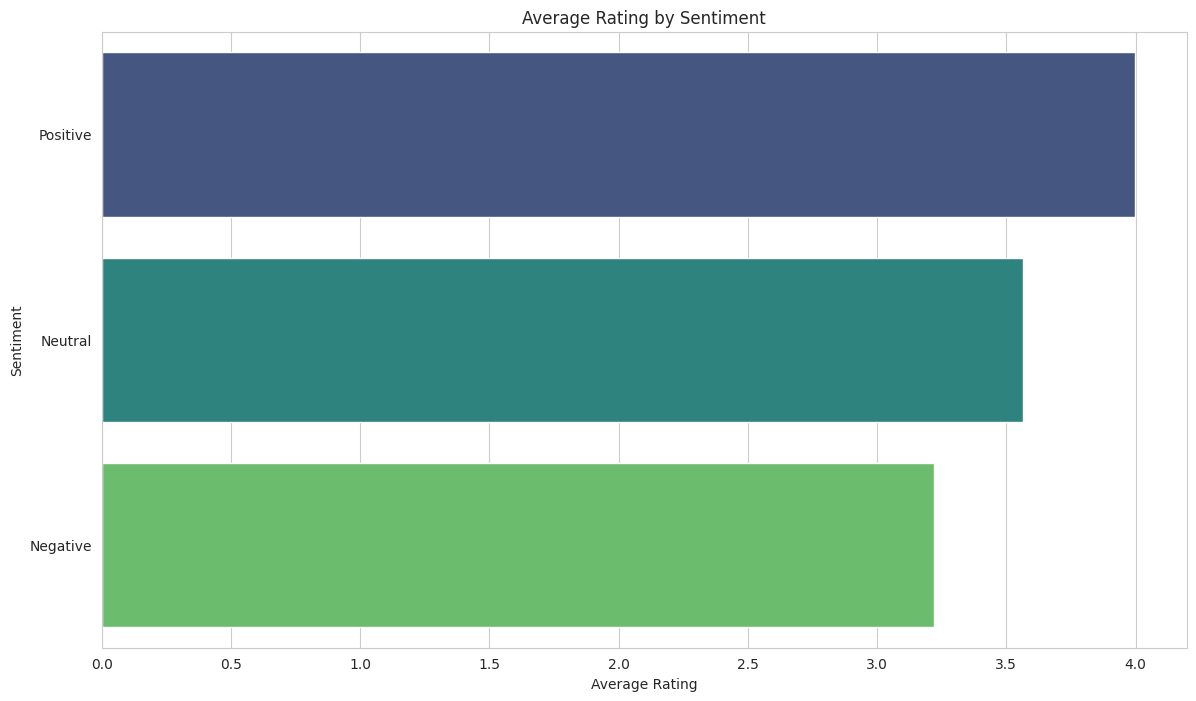

In [ ]:
# Calculate average rating by benefit theme
average_rating_by_sentiment = clean_df_no_outliers.groupby('sentiment')['benefits.comments.val.rating'].mean().sort_values(ascending=False)

# Plot the average rating by benefit theme
plt.figure(figsize=(14, 8))
sns.barplot(x=average_rating_by_sentiment.values, y=average_rating_by_sentiment.index, palette='viridis')
plt.title('Average Rating by Sentiment')
plt.xlabel('Average Rating')
plt.ylabel('Sentiment')
plt.show()



### Results Interpretation

**Summary of Steps:**
1. **Data Preparation:**
   - The dataset was transformed into a binary classification problem, focusing on 'Positive' vs. 'Others' sentiments.

2. **Data Transformation:**
   - Numeric features were standardized, and missing values were handled using pipelines.
   - Categorical features were one-hot encoded.

3. **Model Pipeline:**
   - A RandomForest model pipeline was created, combining preprocessing steps and model training.

4. **Training and Evaluation:**
   - The data was split into training (70%) and testing (30%) sets.
   - The model was trained on the training set and evaluated on the test set.

**Key Results:**
- **Accuracy:** The model achieved an accuracy of **77.33%**, indicating good overall performance.
- **Classification Report:**
  - The model has a higher F1-score for 'Positive' (0.85) compared to 'Others' (0.56).
  - This suggests the model is more effective at identifying positive sentiments.
- **Confusion Matrix:**
  - The model correctly classified **39,650** positive tweets and **9,228** others.
  - However, it also misclassified **3,228** positive tweets as others and **11,104** others as positive.


- The RandomForest model performs well in detecting positive sentiments but struggles more with differentiating 'Others' from 'Positive'.



RandomForest Model
Accuracy: 0.7732637240942889
Classification Report:
               precision    recall  f1-score   support

      Others       0.74      0.45      0.56     20332
    Positive       0.78      0.92      0.85     42878

    accuracy                           0.77     63210
   macro avg       0.76      0.69      0.70     63210
weighted avg       0.77      0.77      0.76     63210



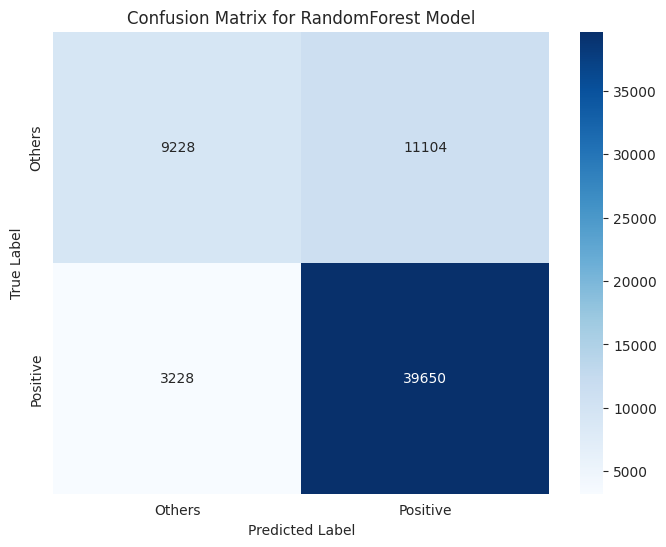

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (already cleaned and prepared)
df = clean_df_no_outliers

# Step 1: Update sentiment labels to 'Positive' vs 'Others'
df['sentiment_binary'] = df['sentiment'].apply(lambda x: 'Positive' if x == 'Positive' else 'Others')

# Step 2: Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 3: Combine all transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['benefits.comments.val.rating', 'benefits.highlights.val.commentCount']),  # Apply numeric transformer to specified columns
        ('cat', categorical_transformer, ['theme'])  # Apply categorical transformer to the 'theme' column
    ],
    remainder='passthrough'  # Pass through all other columns that are not specified
)

# Step 4: Define the pipeline for the RandomForest model
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Include preprocessing steps in the pipeline
    ('classifier', RandomForestClassifier())  # Apply the RandomForest classifier
])

# Step 5: Prepare features (X) and target (y) variables
X = df[['benefits.comments.val.rating', 'benefits.highlights.val.commentCount', 'theme']]  # Features: rating, comment count, and theme
y = df['sentiment_binary']  # Target: sentiment_binary (Positive, Others)

# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Use 70% of the data for training and 30% for testing

# Step 7: Fit the pipeline on the training data
random_forest_pipeline.fit(X_train, y_train)  # Train the RandomForest model

# Step 8: Make predictions on the test data
y_pred_rf = random_forest_pipeline.predict(X_test)  # Predict sentiments on the test set

# Step 9: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate the accuracy of the model
report_rf = classification_report(y_test, y_pred_rf)  # Generate a detailed classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Generate the confusion matrix

# Print results
print("RandomForest Model")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Others', 'Positive'], yticklabels=['Others', 'Positive'])
plt.title('Confusion Matrix for RandomForest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Summary of Results for SVM and Gradient Boosting Models

**SVM Model:**
- **Accuracy:** The SVM model achieved an accuracy of approximately **73.73%**, which is a decent performance but slightly lower than the RandomForest model.
- **Classification Report:**
  - The precision for 'Positive' is **0.75**, with a recall of **0.92**, leading to an F1-score of **0.83**. This indicates that the model is relatively strong at identifying positive sentiments.
  - The 'Others' category has a lower precision of **0.68** and a recall of **0.35**, leading to an F1-score of **0.46**, suggesting that the model struggles more with non-positive sentiments.
- **Confusion Matrix:**
  - The model correctly classified **39,539** positive tweets but misclassified **3,339** positive tweets as others.
  - It also correctly identified **7,065** 'Others' tweets but incorrectly labeled **13,267** 'Others' tweets as positive.




SVM Model
Accuracy: 0.7372884037335865
Classification Report:
               precision    recall  f1-score   support

      Others       0.68      0.35      0.46     20332
    Positive       0.75      0.92      0.83     42878

    accuracy                           0.74     63210
   macro avg       0.71      0.63      0.64     63210
weighted avg       0.73      0.74      0.71     63210



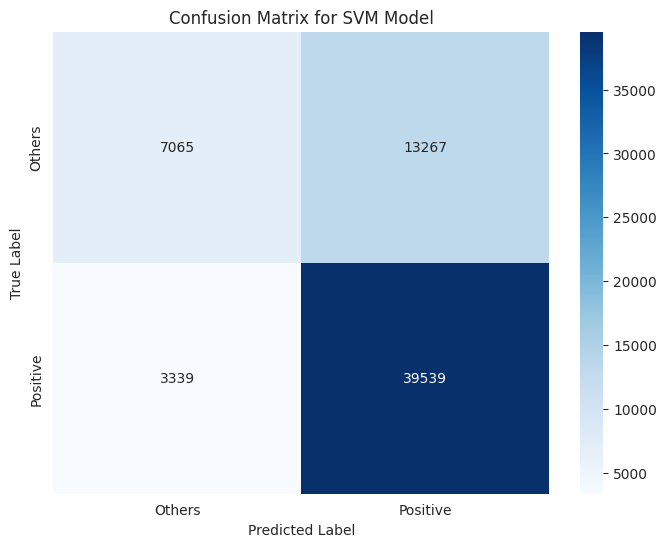

In [ ]:
from sklearn.svm import SVC

# Define the pipeline for the SVM model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Include preprocessing steps in the pipeline
    ('classifier', SVC())  # Apply the SVM classifier
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)  # Train the SVM model

# Make predictions on the test data
y_pred_svm = svm_pipeline.predict(X_test)  # Predict sentiments on the test set

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculate the accuracy of the model
report_svm = classification_report(y_test, y_pred_svm)  # Generate a detailed classification report
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)  # Generate the confusion matrix

# Print results
print("SVM Model")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Others', 'Positive'], yticklabels=['Others', 'Positive'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Gradient Boosting Model:**
- **Accuracy:** The Gradient Boosting model reached an accuracy of **71.87%**, which is slightly lower than the SVM model and RandomForest.
- **Classification Report:**
  - The precision for 'Positive' is **0.72**, with an impressive recall of **0.95**, resulting in an F1-score of **0.82**, indicating that the model is highly effective at recalling positive sentiments.
  - The 'Others' category has lower performance, with a precision of **0.68**, recall of **0.24**, and an F1-score of **0.35**, suggesting significant room for improvement.
- **Confusion Matrix:**
  - The model correctly classified **40,618** positive tweets but misclassified **2,260** positive tweets as others.
  - For the 'Others' category, it correctly identified **4,814** tweets but incorrectly labeled **15,518** as positive.

**Conclusion:**
- **SVM Model:** The SVM model performed better than the Gradient Boosting model in terms of overall accuracy and F1-score, particularly in handling positive sentiments. However, it still struggles with distinguishing 'Others' from 'Positive'.
- **Gradient Boosting Model:** While the Gradient Boosting model has slightly lower accuracy, it excels in recall for positive tweets, making it a strong candidate for scenarios where capturing all positive instances is critical. However, its performance on the 'Others' category is weaker, indicating the need for further tuning or alternative approaches.



Gradient Boosting Model
Accuracy: 0.7187470336971998
Classification Report:
               precision    recall  f1-score   support

      Others       0.68      0.24      0.35     20332
    Positive       0.72      0.95      0.82     42878

    accuracy                           0.72     63210
   macro avg       0.70      0.59      0.59     63210
weighted avg       0.71      0.72      0.67     63210



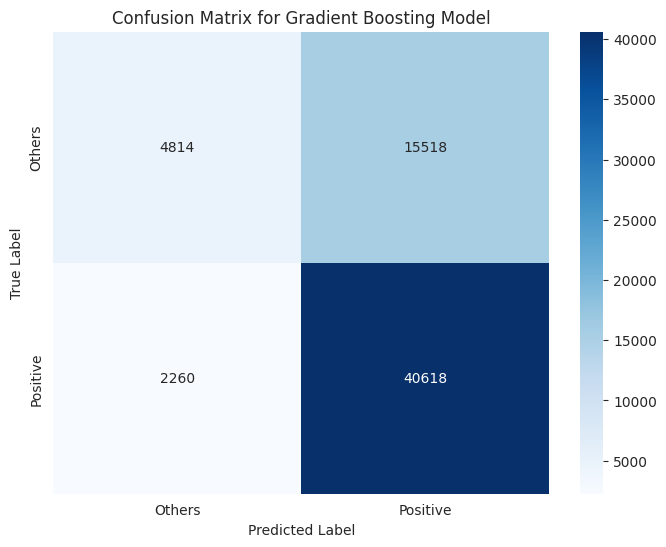

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the pipeline for the Gradient Boosting model
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Include preprocessing steps in the pipeline
    ('classifier', GradientBoostingClassifier())  # Apply the Gradient Boosting classifier
])

# Fit the pipeline on the training data
gradient_boosting_pipeline.fit(X_train, y_train)  # Train the Gradient Boosting model

# Make predictions on the test data
y_pred_gb = gradient_boosting_pipeline.predict(X_test)  # Predict sentiments on the test set

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)  # Calculate the accuracy of the model
report_gb = classification_report(y_test, y_pred_gb)  # Generate a detailed classification report
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)  # Generate the confusion matrix

# Print results
print("Gradient Boosting Model")
print("Accuracy:", accuracy_gb)
print("Classification Report:\n", report_gb)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Others', 'Positive'], yticklabels=['Others', 'Positive'])
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
pip install imbalanced-learn


### Summary of Results for Models with SMOTE

**RandomForest Model with SMOTE:**
- **Accuracy:** The model achieved an accuracy of **73.98%**.
- **Classification Report:**
  - Precision for 'Positive' is **0.89** with a recall of **0.70**, leading to an F1-score of **0.79**.
  - 'Others' has a lower precision of **0.57** but a high recall of **0.82**, resulting in an F1-score of **0.67**.
- **Confusion Matrix:**
  - Correctly classified **30,151** positive tweets but misclassified **12,727** positive tweets as 'Others'.
  - Correctly identified **16,613** 'Others' tweets but incorrectly labeled **3,719** as positive.

**SVM Model with SMOTE:**
- **Accuracy:** The SVM model reached an accuracy of **69.69%**.
- **Classification Report:**
  - Precision for 'Positive' is **0.85** with a recall of **0.67**, resulting in an F1-score of **0.75**.
  - 'Others' have a precision of **0.52** and a recall of **0.75**, leading to an F1-score of **0.61**.
- **Confusion Matrix:**
  - Correctly classified **28,897** positive tweets but misclassified **13,981** positive tweets as 'Others'.
  - Correctly identified **15,155** 'Others' tweets but incorrectly labeled **5,177** as positive.

**Gradient Boosting Model with SMOTE:**
- **Accuracy:** The Gradient Boosting model achieved an accuracy of **67.12%**.
- **Classification Report:**
  - Precision for 'Positive' is **0.85** with a recall of **0.63**, leading to an F1-score of **0.72**.
  - 'Others' have a precision of **0.49** and a recall of **0.76**, resulting in an F1-score of **0.60**.
- **Confusion Matrix:**
  - Correctly classified **27,004** positive tweets but misclassified **15,874** positive tweets as 'Others'.
  - Correctly identified **15,428** 'Others' tweets but incorrectly labeled **4,904** as positive.

**Conclusion:**
- **RandomForest Model with SMOTE** demonstrated the best balance between precision and recall for both classes, making it the most reliable among the models tested.
- **SVM Model with SMOTE** performed better in terms of correctly identifying 'Others' but still had a lower overall accuracy compared to the RandomForest.
- **Gradient Boosting Model with SMOTE** had the lowest accuracy, with difficulties in correctly classifying 'Positive' sentiments, suggesting it may not be as effective in this particular classification task.


Training and evaluating RandomForest model with SMOTE...

RandomForest Model with SMOTE
Accuracy: 0.7398196487897485
Classification Report:
               precision    recall  f1-score   support

      Others       0.57      0.82      0.67     20332
    Positive       0.89      0.70      0.79     42878

    accuracy                           0.74     63210
   macro avg       0.73      0.76      0.73     63210
weighted avg       0.79      0.74      0.75     63210



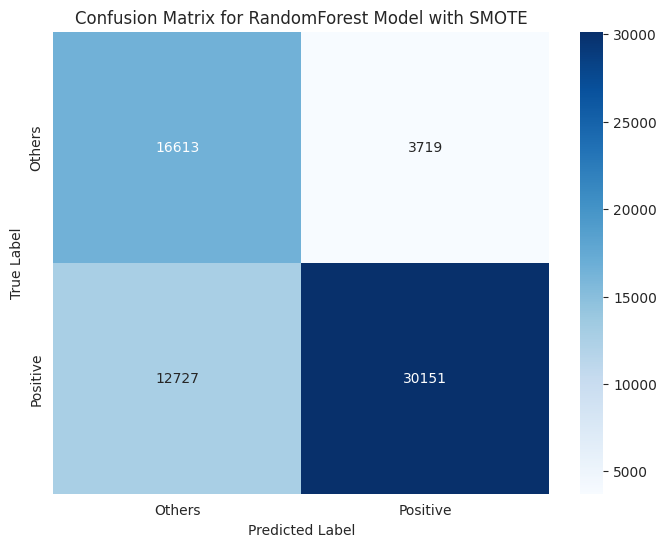

Training and evaluating SVM model with SMOTE...

SVM Model with SMOTE
Accuracy: 0.6969150450878026
Classification Report:
               precision    recall  f1-score   support

      Others       0.52      0.75      0.61     20332
    Positive       0.85      0.67      0.75     42878

    accuracy                           0.70     63210
   macro avg       0.68      0.71      0.68     63210
weighted avg       0.74      0.70      0.71     63210



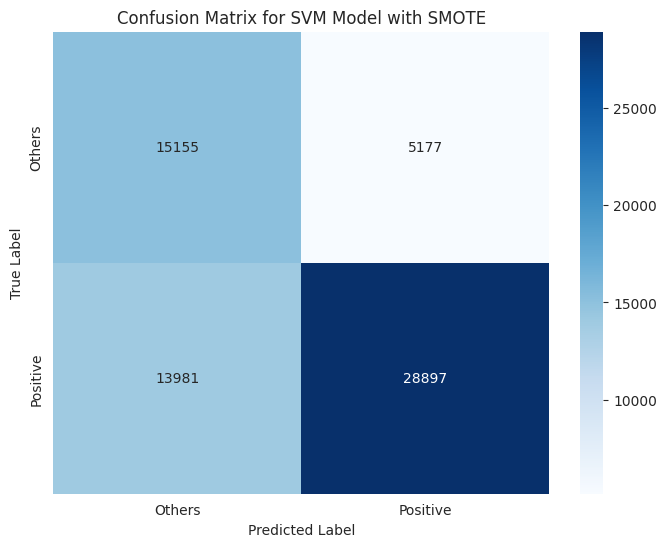

Training and evaluating Gradient Boosting model with SMOTE...

Gradient Boosting Model with SMOTE
Accuracy: 0.6712861888941624
Classification Report:
               precision    recall  f1-score   support

      Others       0.49      0.76      0.60     20332
    Positive       0.85      0.63      0.72     42878

    accuracy                           0.67     63210
   macro avg       0.67      0.69      0.66     63210
weighted avg       0.73      0.67      0.68     63210



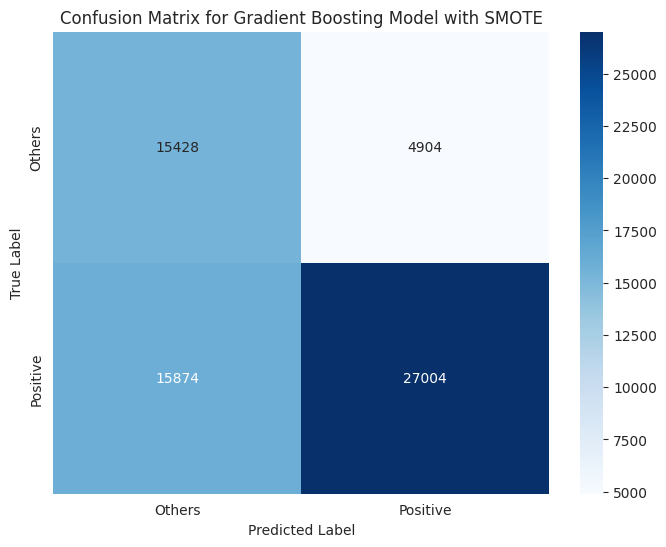

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Use ImbPipeline from imblearn

# Define SMOTE
smote = SMOTE(random_state=42)

# Define your model pipelines with SMOTE

# RandomForest with SMOTE
random_forest_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('smote', smote),  # Apply SMOTE
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForest classifier
])

# SVM with SMOTE
svm_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('smote', smote),  # Apply SMOTE
    ('classifier', SVC(random_state=42))  # SVM classifier
])

# Gradient Boosting with SMOTE
gradient_boosting_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('smote', smote),  # Apply SMOTE
    ('classifier', GradientBoostingClassifier(random_state=42))  # Gradient Boosting classifier
])

# Train and evaluate each model
for name, model_pipeline in [('RandomForest', random_forest_pipeline_smote),
                             ('SVM', svm_pipeline_smote),
                             ('Gradient Boosting', gradient_boosting_pipeline_smote)]:
    print(f"Training and evaluating {name} model with SMOTE...")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f"\n{name} Model with SMOTE")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Others', 'Positive'], yticklabels=['Others', 'Positive'])
    plt.title(f'Confusion Matrix for {name} Model with SMOTE')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Best accuracy for RandomForest: 0.7405790223065971
Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

      Others       0.57      0.81      0.67     20332
    Positive       0.89      0.71      0.79     42878

    accuracy                           0.74     63210
   macro avg       0.73      0.76      0.73     63210
weighted avg       0.79      0.74      0.75     63210

Confusion Matrix:
 [[16561  3771]
 [12627 30251]]


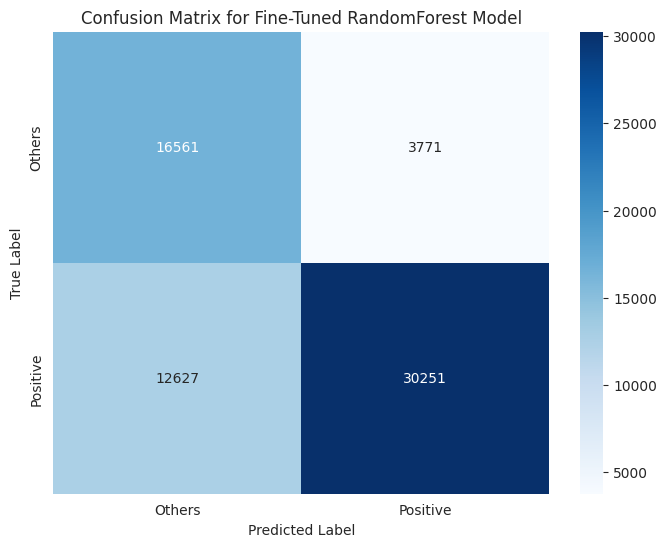

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Define SMOTE
smote = SMOTE(random_state=42)

# Define the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for RandomForest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create a pipeline with SMOTE and RandomForest
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('smote', smote),                # Apply SMOTE
    ('classifier', rf_model)         # Apply the RandomForest model
])

# Apply GridSearchCV
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')

# Train the model using the training data
grid_rf.fit(X_train, y_train)  # Use the original X_train and y_train

# Get the best model after fine-tuning
best_rf_model = grid_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)  # Use the original X_test

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Display the best hyperparameters
print(f"Best accuracy for RandomForest: {accuracy_rf}")
print(f"Best parameters: {grid_rf.best_params_}")

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Display the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Others', 'Positive'], yticklabels=['Others', 'Positive'])
plt.title('Confusion Matrix for Fine-Tuned RandomForest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Top 10 Feature Importances:
                                 Feature  Importance
1   benefits.highlights.val.commentCount    0.545386
0           benefits.comments.val.rating    0.303867
8                            theme_Other    0.034431
6                  theme_Health Benefits    0.031239
11                  theme_Work From Home    0.024581
10                        theme_Sick Pay    0.018140
4                      theme_Flexibility    0.015159
7                     theme_Leave Policy    0.013687
3                  theme_Discounts/Perks    0.006997
12               theme_Work-Life Balance    0.004402


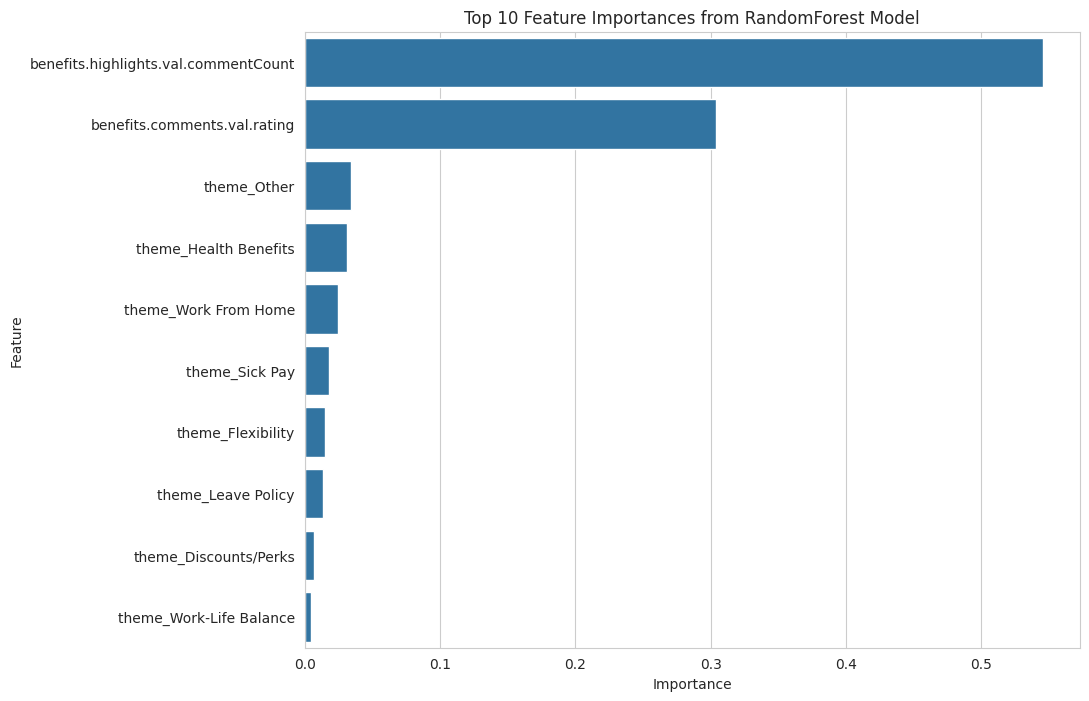

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the best RandomForest model
feature_importances = best_rf_model.named_steps['classifier'].feature_importances_

# Get the feature names from your preprocessor
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]

# Get the names for the categorical features after one-hot encoding
onehot_feature_names = best_rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric and one-hot encoded categorical feature names
final_feature_names = list(numeric_features) + list(onehot_feature_names)

# Combine the feature names with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

# Visualize the top features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances from RandomForest Model')
plt.show()



Top 5 Feature Importances:
                                 Feature  Importance
1   benefits.highlights.val.commentCount    0.545386
0           benefits.comments.val.rating    0.303867
8                            theme_Other    0.034431
6                  theme_Health Benefits    0.031239
11                  theme_Work From Home    0.024581


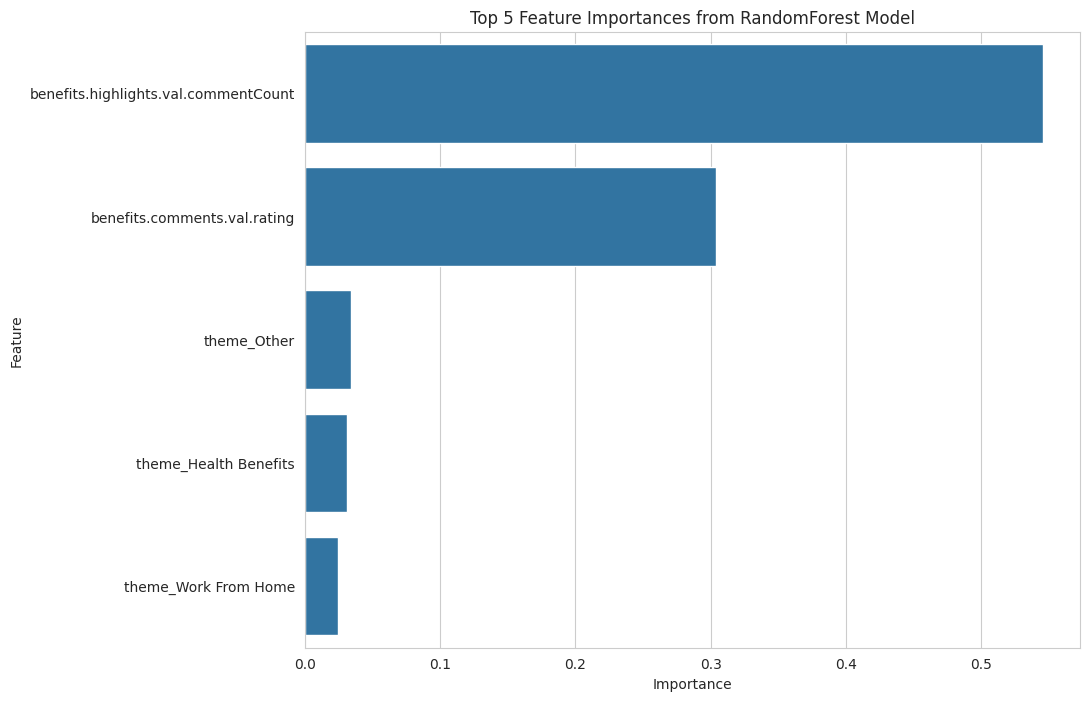

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the best RandomForest model
feature_importances = best_rf_model.named_steps['classifier'].feature_importances_

# Get the feature names from your preprocessor
numeric_features = preprocessor.transformers_[0][2]  # Numeric feature names
categorical_features = preprocessor.transformers_[1][2]  # Categorical feature names

# Get the names for the categorical features after one-hot encoding
onehot_feature_names = best_rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numeric and one-hot encoded categorical feature names
final_feature_names = list(numeric_features) + list(onehot_feature_names)

# Combine the feature names with their importance values
feature_importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 5 important features
print("Top 5 Feature Importances:")
print(feature_importance_df.head(5))

# Visualize the top 5 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5))
plt.title('Top 5 Feature Importances from RandomForest Model')
plt.show()



In [ ]:
import pickle

best_model = best_rf_model


filename = 'irsyad.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {filename}")


Model saved as irsyad.pkl


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/third_party/botocore/data/bedrock-agent-runtime/2023-07-26/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-agent/2023-06-05/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-agent/2023-06-05/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-agent/2023-06-05/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-runtime/2023-09-30/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-runtime/2023-09-30/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-runtime/2023-09-30/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock-runtime/2023-09-30/waiters-2.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock/2023-04-20/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/bedrock/2023-04-20/paginators-1.json
google-cloud-sdk/lib/third_party/bot

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
core:
  account: pmr09256@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you want to use for this configuration.
To use a federated user account, exit this command and sign in to the gcloud CLI
 with your login configuration file, then run this command again.

Select an account:
 [1] pmr09256@gmail.com
 [2] Sign in with a new Google Account
 [3] Skip this step
Please enter

In [ ]:
!gsutil cp irsyad.pkl gs://glassdoor_bucket_it3388/glassdoor/models/irsyad.pkl

Copying file://irsyad.pkl [Content-Type=application/octet-stream]...
|
Operation completed over 1 objects/5.4 MiB.                                      


#### 2. Correlation Analysis:
- **Explanation:**
   - Correlation measures the strength and direction of the linear relationship between two variables. A positive correlation means that as one variable increases, the other tends to increase as well.
   - The correlation between `benefits.comments.val.rating` and sentiment was `0.221`. Although this is a moderate correlation, it indicates that higher benefits ratings are associated with more positive sentiment. The weaker correlation (`0.020`) for `benefits.highlights.val.commentCount` suggests that the number of comments alone may not have a strong direct influence but could still be significant when combined with other factors.
   - These correlations, even if modest, provide statistical evidence that as the perceived quality of benefits improves, so does employee sentiment.

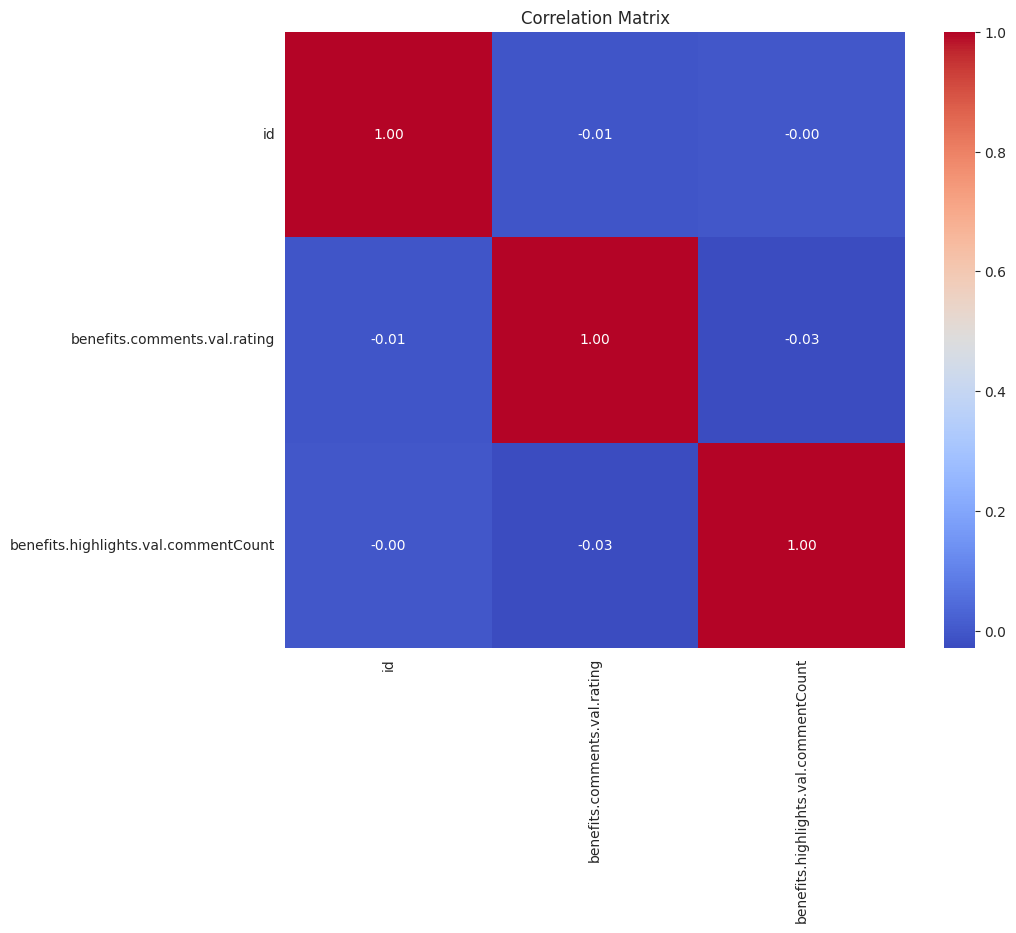

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 19.8 MB/s eta 0:00:00


3. Model Performance and Cross-Validation:
Explanation:

Cross-validation is a technique used to evaluate the robustness and generalizability of a model. By splitting the data into several parts (folds), we train the model on some parts and test it on others, ensuring that the model isn't just memorizing the data but actually learning patterns that apply broadly.
The cross-validation scores ranged from 0.774 to 0.776, with an average of 0.775. This consistency indicates that the model performs reliably across different subsets of the data, suggesting that the relationship between benefits quality and sentiment is stable and not due to overfitting or randomness.

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(random_forest_pipeline, X, y, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Average CV Score: {cross_val_scores.mean()}")



Cross-Validation Scores: [0.77475083 0.77534409 0.77616934 0.77495906 0.77507772]
Average CV Score: 0.7752602098060148


In [ ]:
# Convert sentiment to binary: Positive = 1, Others = 0
df['sentiment_binary_num'] = df['sentiment_binary'].apply(lambda x: 1 if x == 'Positive' else 0)

# Calculate correlation
correlation_rating = df['benefits.comments.val.rating'].corr(df['sentiment_binary_num'])
correlation_comment_count = df['benefits.highlights.val.commentCount'].corr(df['sentiment_binary_num'])

print(f"Correlation between benefits rating and sentiment: {correlation_rating}")
print(f"Correlation between benefits comment count and sentiment: {correlation_comment_count}")




Correlation between benefits rating and sentiment: 0.22181058713850607
Correlation between benefits comment count and sentiment: 0.0820234717846158




### Conclusion:
Thus, when considering both the correlation and the feature importance, the evidence supports the hypothesis that employee benefits quality significantly impacts sentiment. The positive correlation aligns with the hypothesis, and the high feature importance indicates that these features are key drivers of sentiment when all factors are considered.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_data(/content/drive/MyDrive/glassdoor/glassdoor_benefits_comments.csv, /content/drive/MyDrive/glassdoor/glassdoor_benefits_highlights.csv):
    """
    Load, clean, preprocess data, including handling missing values and One-Hot Encoding for categorical variables.

    Parameters:
    - comments_file_path (str): Path to the comments CSV file.
    - highlights_file_path (str): Path to the highlights CSV file.

    Returns:
    - pd.DataFrame: Cleaned and preprocessed DataFrame, ready for further analysis or modeling.
    """

    # Load the CSV files
    comments_df = pd.read_csv('/content/drive/MyDrive/glassdoor/glassdoor_benefits_comments.csv')
    highlights_df = pd.read_csv('/content/drive/MyDrive/glassdoor/glassdoor_benefits_highlights.csv')

    # Select relevant columns
    relevant_comments_columns = ['id', 'benefits.comments.val.rating', 'benefits.comments.val.comment']
    relevant_highlights_columns = ['id', 'benefits.highlights.val.highlightPhrase', 'benefits.highlights.val.commentCount']

    comments_df_relevant = comments_df[relevant_comments_columns]
    highlights_df_relevant = highlights_df[relevant_highlights_columns]

    # Remove rows with missing values in relevant columns
    cleaned_comments_df = comments_df_relevant.dropna()
    cleaned_highlights_df = highlights_df_relevant.dropna()

    # Merge the datasets using the 'id' column
    merged_df = pd.merge(cleaned_comments_df, cleaned_highlights_df, on='id', how='inner')

    # Drop duplicates
    clean_df = merged_df.drop_duplicates()

    # Define the numeric and categorical columns
    numeric_features = ['benefits.comments.val.rating', 'benefits.highlights.val.commentCount']
    categorical_features = ['benefits.highlights.val.highlightPhrase']

    # Create preprocessing pipelines for numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numeric columns
        ('scaler', StandardScaler())  # Standardize numeric features
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values in categorical columns
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])

    # Combine all transformers into a single preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'  # Pass through all other columns that are not specified
    )

    # Fit and transform the data
    clean_df_processed = preprocessor.fit_transform(clean_df)

    # Convert the processed data back to a DataFrame
    feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
    clean_df_processed = pd.DataFrame(clean_df_processed, columns=feature_names)

    return clean_df_processed

# Example usage in a Streamlit app
# import streamlit as st

# comments_file_path = 'glassdoor_benefits_comments.csv'
# highlights_file_path = 'glassdoor_benefits_highlights.csv'

# cleaned_df = preprocess_data(comments_file_path, highlights_file_path)

# st.write("Cleaned and Preprocessed Data")
# st.dataframe(cleaned_df)


In [ ]:
# prompt:  new data is coming in: using the pickle file we have saved, create a function to easily prepare the data for prediction using the model in the pickle file

import pickle

def prepare_data_for_prediction(new_data_df, preprocessor_filename='irsyad.pkl'):
  """
  Prepares new data for prediction using the saved preprocessor.

  Args:
    new_data_df: A pandas DataFrame containing the new data.
    preprocessor_filename: The filename of the saved preprocessor pickle file.

  Returns:
    A numpy array of preprocessed data ready for prediction.
  """

  # Load the saved preprocessor
  with open(preprocessor_filename, 'rb') as file:
    preprocessor = pickle.load(file)

  # Preprocess the new data using the loaded preprocessor
  preprocessed_data = preprocessor.transform(new_data_df)

  return preprocessed_data
